In [1]:
import pandas as pd
import numpy as np

# Finance Library import
import os
import sys
sys.path.append("C:\\DualMomentum\\BackTesting")
from Library import FinanceLibrary as fl

In [2]:
df = pd.read_csv("..\\Data\\KODEX200_data.csv", encoding="utf-8", engine="python")

In [3]:
df.index = pd.to_datetime(df["Date"])
df = df["2015"]
df = df[["High","Low","Close"]]

df["ATR"] = fl.ATR(df["High"],df["Low"],df["Close"],14)
#atr = fl.ATR(df["High"],df["Low"],df["Close"],14)
#atr.name = "ATR"
#df = pd.concat([df,atr],axis=1)

##### 윈도우 값

In [4]:
win = 20

#### ATR배수값

In [5]:
# ATR 배수값
AtrMulti = 3

In [6]:
# 진입 Flag
Entry = 0  # "1"이면 진입

df["Max"] = df["Close"].rolling(window=win,min_periods=1).max()
df["Min"] = df["Close"].rolling(window=win,min_periods=1).min()
# MaxHigh는 샹들리에 청산에서 청산 가격이 됨
df["MaxHigh"] = df["Max"] - df["ATR"] * AtrMulti
# MinLow는 Trailing Stop에서 청산 가격이 됨
df["MinLow"] = df["Min"] + df["ATR"] * AtrMulti
df["ATR_Close 비율"] = df["ATR"]/df["Close"] * 100

In [7]:
df.head()

,High,Low,Close,ATR,Max,Min,MaxHigh,MinLow,ATR_Close 비율
Date,,,,,,,,,
2015-01-02,23056,22874,23038,NaN,23038.0,23038.0,NaN,NaN,NaN
2015-01-05,23041,22758,22994,189.0,23038.0,22994.0,22471.0,23561.0,0.821954
2015-01-06,22790,22520,22585,249.0,23038.0,22585.0,22291.0,23332.0,1.102502
2015-01-07,22663,22529,22633,300.0,23038.0,22585.0,22138.0,23485.0,1.325498
2015-01-08,22985,22744,22922,274.0,23038.0,22585.0,22216.0,23407.0,1.195358


In [8]:
DD, MDD = fl.MDD(df["Close"])

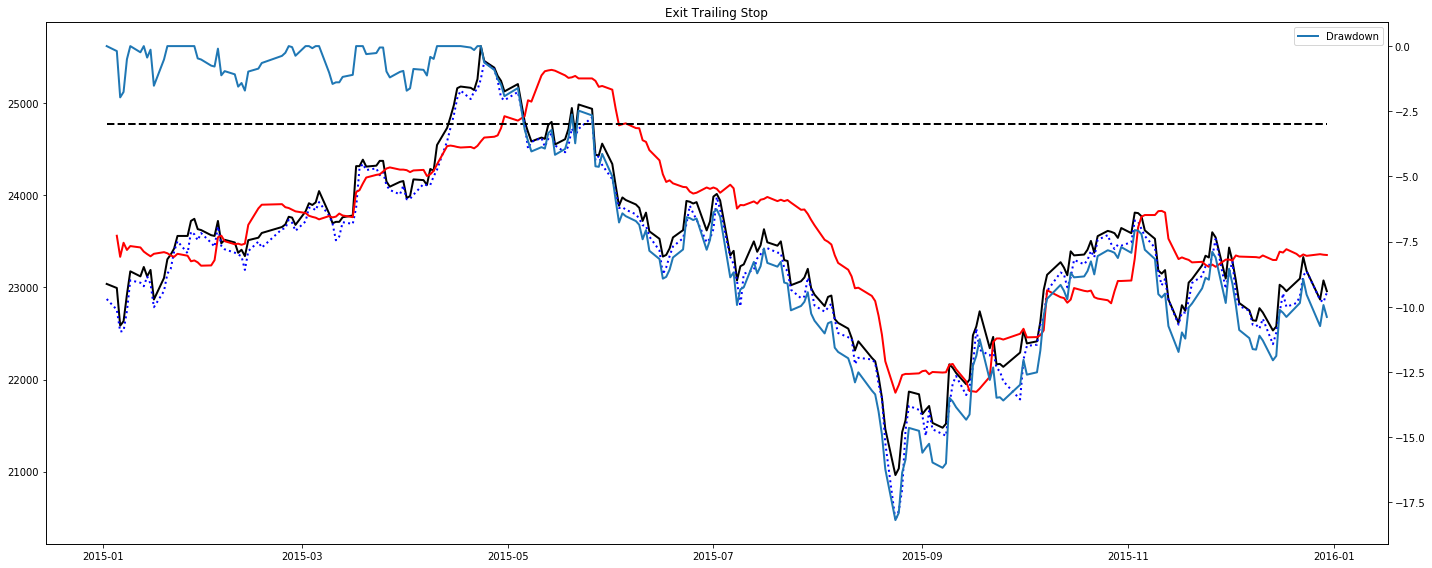

In [9]:
%matplotlib inline
import matplotlib.pylab as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams['lines.linewidth'] = 2
#plt.rcParams['lines.color'] = 'Black'
plt.rcParams['axes.grid'] = False 

fig, ax1 = plt.subplots()
ax1.plot(df["Close"],color="Black",label="Close")
ax1.plot(df["Low"],linestyle=":",color="Blue", label="Low")
ax1.plot(df["MinLow"], color="Red", label="MinLow")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(DD)
ax2.hlines(linestyle="--",y=-3,xmin=DD.index[0],xmax=DD.index[-1])

plt.title("Exit Trailing Stop")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()
plt.show()

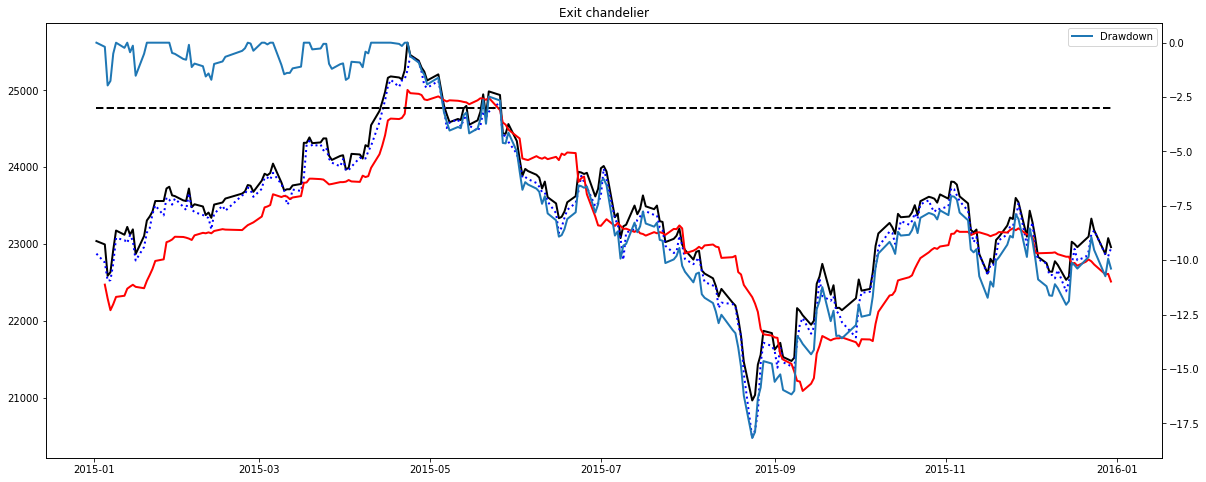

In [10]:
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams['lines.linewidth'] = 2
#plt.rcParams['lines.color'] = 'Black'
plt.rcParams['axes.grid'] = False 

fig, ax1 = plt.subplots()
ax1.plot(df["Close"],color="Black",label="Close")
ax1.plot(df["Low"],linestyle=":",color="Blue", label="Low")
ax1.plot(df["MaxHigh"], color="Red", label="MaxHigh")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(DD)
ax2.hlines(linestyle="--",y=-3,xmin=DD.index[0],xmax=DD.index[-1])

plt.title("Exit chandelier")
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()
plt.show()